In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tifffile import imsave,imread
import sys
sys.path.append('../')
from noise2seg.models import Noise2Seg

from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.patches as patches

Using TensorFlow backend.


In [2]:
def fraction_to_abs(fracs, max_num_imgs=3800):
    return np.round(max_num_imgs*fracs/100)

# DSB n10

In [3]:
test_dsb_n10 = np.load('/data/Noise2Seg/data/DSB2018_n10/test/test_data.npz')

In [4]:
for k in test_dsb_n10.iterkeys():
    print(k)

X_test
Y_test


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  """Entry point for launching an IPython kernel.


In [5]:
dsb_fraction = 0.25
dsb_total_imgs = np.load('/data/Noise2Seg/data/DSB2018_n10/train/train_data.npz')['X_train'].shape[0]
dsb_seg_imgs = int(fraction_to_abs(dsb_fraction, dsb_total_imgs))
print(dsb_total_imgs, dsb_seg_imgs)

3800 10


In [6]:
dsb_frame = 45
dsb_in = test_dsb_n10['X_test'][dsb_frame].astype(np.float32)[:512, :512]
dsb_gt = test_dsb_n10['Y_test'][dsb_frame].astype(np.float32)[:512, :512]

In [7]:
basedir = '/data/Noise2Seg/experiments/finAlphaLinear0.5_dsb_n10_run3/fraction_{}/'.format(dsb_fraction)

In [8]:
dsb_model = Noise2Seg(None, name='finAlphaLinear0.5_dsb_n10_run3_model', basedir=basedir)














Loading network weights from 'weights_best.h5'.


In [9]:
dsb_pred = dsb_model.predict(dsb_in, axes='YX')

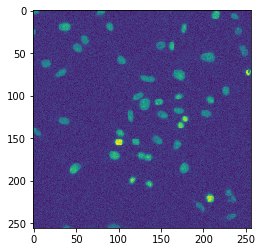

In [10]:
plt.imshow(dsb_in)

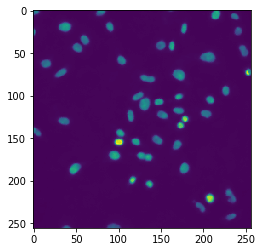

In [11]:
plt.imshow(dsb_pred[...,0])

In [12]:
dsb_bl = imread('/data/Noise2Seg/experiments/fin_dsb_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
        dsb_fraction, str(dsb_frame).zfill(2)))[:512, :512]

dsb_seq = imread('/data/Noise2Seg/experiments/finSeq_dsb_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
    dsb_fraction, str(dsb_frame).zfill(2)))[:512, :512]

dsb_joint = imread('/data/Noise2Seg/experiments/finAlphaLinear0.5_dsb_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
    dsb_fraction, str(dsb_frame).zfill(2)))[:512, :512]

# Fly Wing

In [13]:
test_flywing_n10 = np.load('/data/Noise2Seg/data/Flywing_n10/test/test_data.npz')

In [14]:
flywing_fraction = 0.125
flywing_total_imgs = np.load('/data/Noise2Seg/data/Flywing_n10/train/train_data.npz')['X_train'].shape[0]
flywing_seg_imgs = int(fraction_to_abs(flywing_fraction, flywing_total_imgs))
print(flywing_total_imgs, flywing_seg_imgs)

1428 2


In [15]:
flywing_frame = 40
flywing_in = test_flywing_n10['X_test'][flywing_frame].astype(np.float32)
flywing_gt = test_flywing_n10['Y_test'][flywing_frame].astype(np.float32)

In [16]:
flywing_model = Noise2Seg(None, name='alphaLinear0.5_flywing_n10_run3_model', basedir='/data/Noise2Seg/experiments/alphaLinear0.5_flywing_n10_run3/fraction_{}/'.format(flywing_fraction))

Loading network weights from 'weights_best.h5'.


In [17]:
flywing_pred = flywing_model.predict(flywing_in, axes='YX')

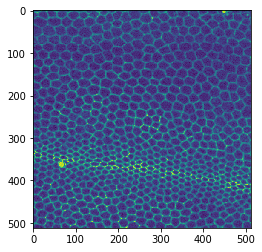

In [18]:
plt.imshow(flywing_in)

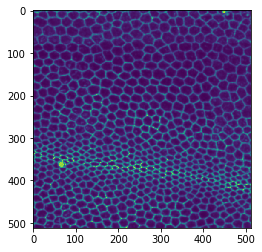

In [19]:
plt.imshow(flywing_pred[...,0])

In [20]:
flywing_bl = imread('/data/Noise2Seg/experiments/fin_flywing_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
    flywing_fraction, flywing_frame))

In [21]:
flywing_seq = imread('/data/Noise2Seg/experiments/finSeq_nflywing_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
    flywing_fraction, flywing_frame))

In [22]:
flywing_joint = imread('/data/Noise2Seg/experiments/alphaLinear0.5_flywing_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
    flywing_fraction, flywing_frame))

# Mouse

In [23]:
test_mouse_n10 = np.load('/data/Noise2Seg/data/Mouse_n10/test/test_data.npz')

In [24]:
mouse_fraction = 0.25
mouse_total_imgs = np.load('/data/Noise2Seg/data/Mouse_n10/train/train_data.npz')['X_train'].shape[0]
mouse_seg_imgs = int(fraction_to_abs(mouse_fraction, mouse_total_imgs))
print(mouse_total_imgs, mouse_seg_imgs)

908 2


In [25]:
mouse_frame = 23
mouse_in = test_mouse_n10['X_test'][mouse_frame].astype(np.float32)
mouse_gt = test_mouse_n10['Y_test'][mouse_frame].astype(np.float32)

In [26]:
mouse_model = Noise2Seg(None, name='finAlphaLinear0.5_nmouse_n10_run3_model', basedir='/data/Noise2Seg/experiments/finAlphaLinear0.5_nmouse_n10_run3/fraction_{}/'.format(mouse_fraction))

Loading network weights from 'weights_best.h5'.


In [27]:
mouse_pred = mouse_model.predict(mouse_in, axes='YX')

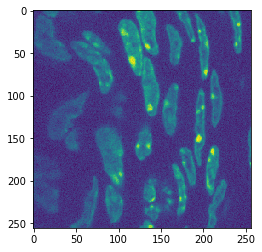

In [28]:
plt.imshow(mouse_in)

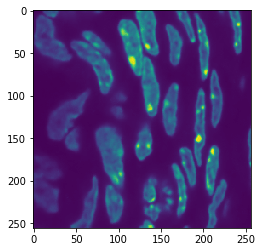

In [29]:
plt.imshow(mouse_pred[...,0])

In [30]:
mouse_bl = imread('/data/Noise2Seg/experiments/fin_nmouse_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
        mouse_fraction, str(mouse_frame).zfill(2)))

mouse_seq = imread('/data/Noise2Seg/experiments/finSeq_nmouse_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
    mouse_fraction, str(mouse_frame).zfill(2)))

mouse_joint = imread('/data/Noise2Seg/experiments/finAlphaLinear0.5_nmouse_n10_run3/fraction_{}/SEG/mask0{}.tif'.format(
    mouse_fraction, str(mouse_frame).zfill(2)))

# Figure

In [31]:
def cm2inch(*tupl, scale=3):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(scale * i/inch for i in tupl[0])
    else:
        return tuple(scale * i/inch for i in tupl)

In [32]:
def imshow(ax, img, cmap='magma', vmin=None, vmax=None):
    if not vmin:
        ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
    else:
        ax.imshow(img, cmap=cmap)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)

In [33]:
from collections import Counter
def relabel_gt(gt, offset=0):
    labels = np.unique(gt)
    for i in range(1, len(labels)):
        gt[gt == labels[i]] = i + offset

def relabel(gt, seg, offset=0):
    relabel_gt(seg, offset)
    seg_labels = np.unique(seg)
    new_seg = np.zeros_like(seg)
    
    used = []
    later = []
    for i in range(1+offset, len(seg_labels)+offset):
        label = np.argmax(np.bincount(gt[seg == i].astype(np.int16)))

        if label in used:
            later.append(i)
        else:
            if label == 0:
                later.append(i)
            else:
                new_seg[seg == i] = label
                used.append(label)
            
    for i, j in enumerate(range(len(later))):
        new_seg[seg == later[i]] = j + len(np.unique(gt)) + 1
        
    return new_seg
            


In [34]:
def color_map(N=256, normalized=True, offset = 0):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        if i > 0:
            c += offset
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            c = c >> 3

        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap

newcmp = color_map(30)

3800 10


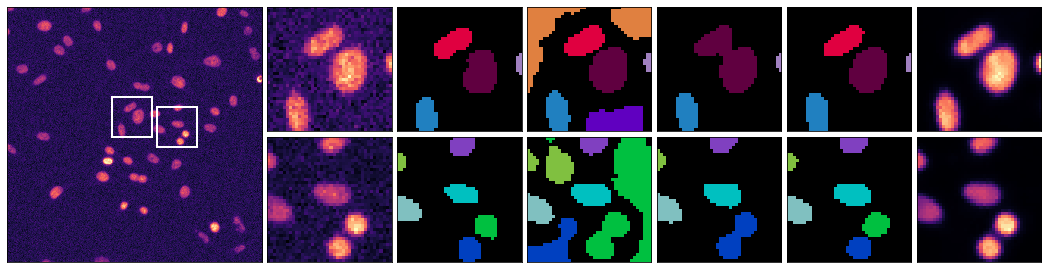

In [35]:
# Set up the axes with gridspec
fig = plt.figure(figsize=cm2inch(12.2, 3.0))
grid = plt.GridSpec(2, 8, left=0.0, right=1.0, bottom=0.0, top=1.0, hspace=0.05, wspace=0.01)
dsb_full = fig.add_subplot(grid[:2, :2])

dsb_in_0 = fig.add_subplot(grid[0, 2])
dsb_gt_0 = fig.add_subplot(grid[0, 3])
dsb_bl_0 = fig.add_subplot(grid[0, 4])
dsb_blSeq_0 = fig.add_subplot(grid[0, 5])
dsb_dNs_0 = fig.add_subplot(grid[0, 6])
dsb_n2v_0 = fig.add_subplot(grid[0, 7])

dsb_in_1 = fig.add_subplot(grid[1, 2])
dsb_gt_1 = fig.add_subplot(grid[1, 3])
dsb_bl_1 = fig.add_subplot(grid[1, 4])
dsb_blSeq_1 = fig.add_subplot(grid[1, 5])
dsb_dNs_1 = fig.add_subplot(grid[1, 6])
dsb_n2v_1 = fig.add_subplot(grid[1, 7])

newcmp = LinearSegmentedColormap.from_list('bla', color_map(50, offset=101), N=50)
imshow(dsb_full, dsb_in)
inset = (slice(90,130), slice(105,145))
in_0 = patches.Rectangle((105, 90), 40, 40, linewidth=2, edgecolor='white', facecolor='none')
dsb_full.add_patch(in_0)
imshow(dsb_in_0, dsb_in[inset])
gt_0 = dsb_gt[inset].copy()
relabel_gt(gt_0)
bl_0 = relabel(gt_0, dsb_bl[inset].copy())
seq_0 = relabel(gt_0, dsb_seq[inset].copy())
joint_0 = relabel(gt_0, dsb_joint[inset].copy())
imshow(dsb_gt_0, gt_0, cmap=newcmp, vmin=0, vmax=50)
imshow(dsb_bl_0, bl_0, cmap=newcmp, vmin=0, vmax=50)
imshow(dsb_blSeq_0, seq_0, cmap=newcmp, vmin=0, vmax=50)
imshow(dsb_dNs_0, joint_0, cmap=newcmp, vmin=0, vmax=50)
imshow(dsb_n2v_0, dsb_pred[inset][...,0])

newcmp = LinearSegmentedColormap.from_list('bla', color_map(30, offset=42), N=30)
imshow(dsb_full, dsb_in)
inset = (slice(100,140), slice(150,190))
in_1 = patches.Rectangle((150, 100), 40, 40, linewidth=2, edgecolor='white', facecolor='none')
dsb_full.add_patch(in_1)
imshow(dsb_in_1, dsb_in[inset])
gt_1 = dsb_gt[inset].copy()
relabel_gt(gt_1, offset=7)
bl_1 = relabel(gt_1, dsb_bl[inset].copy(), offset=7)
seq_1 = relabel(gt_1, dsb_seq[inset].copy(), offset=7)
joint_1 = relabel(gt_1, dsb_joint[inset].copy(), offset=7)
imshow(dsb_gt_1, gt_1, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_bl_1, bl_1, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_blSeq_1, seq_1, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_dNs_1, joint_1, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_n2v_1, dsb_pred[inset][...,0])

plt.savefig('/data/Noise2Seg/Figures/qualitative/dsb_qualitative.pdf', pad_inches=0)
print(dsb_total_imgs, dsb_seg_imgs)

1428 2


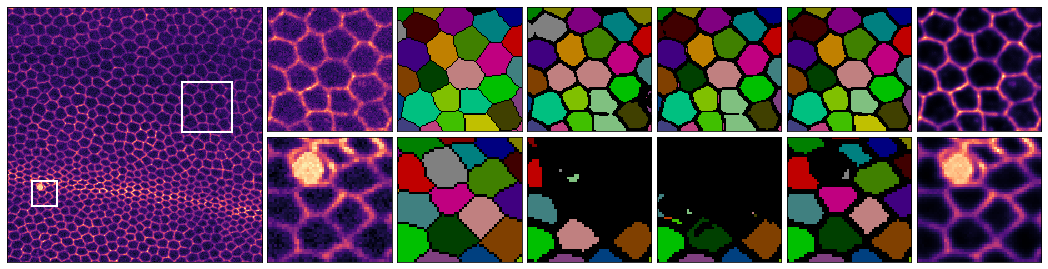

In [36]:
# Set up the axes with gridspec
fig = plt.figure(figsize=cm2inch(12.2, 3.0))
grid = plt.GridSpec(2, 8, left=0.0, right=1.0, bottom=0.0, top=1.0, hspace=0.05, wspace=0.01)
dsb_full = fig.add_subplot(grid[:2, :2])

dsb_in_0 = fig.add_subplot(grid[0, 2])
dsb_gt_0 = fig.add_subplot(grid[0, 3])
dsb_bl_0 = fig.add_subplot(grid[0, 4])
dsb_blSeq_0 = fig.add_subplot(grid[0, 5])
dsb_dNs_0 = fig.add_subplot(grid[0, 6])
dsb_n2v_0 = fig.add_subplot(grid[0, 7])

dsb_in_1 = fig.add_subplot(grid[1, 2])
dsb_gt_1 = fig.add_subplot(grid[1, 3])
dsb_bl_1 = fig.add_subplot(grid[1, 4])
dsb_blSeq_1 = fig.add_subplot(grid[1, 5])
dsb_dNs_1 = fig.add_subplot(grid[1, 6])
dsb_n2v_1 = fig.add_subplot(grid[1, 7])

newcmp = LinearSegmentedColormap.from_list('bla', color_map(30), N=30)
imshow(dsb_full, flywing_in)
inset = (slice(150,250), slice(350,450))
in_0 = patches.Rectangle((350, 150), 100, 100, linewidth=2, edgecolor='white', facecolor='none')
dsb_full.add_patch(in_0)
imshow(dsb_in_0, flywing_in[inset])
gt_0 = flywing_gt[inset].copy()
relabel_gt(gt_0)
bl_0 = relabel(gt_0, flywing_bl[inset].copy())
seq_0 = relabel(gt_0, flywing_seq[inset].copy())
joint_0 = relabel(gt_0, flywing_joint[inset].copy())
imshow(dsb_gt_0, gt_0, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_bl_0, bl_0, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_blSeq_0, seq_0, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_dNs_0, joint_0, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_n2v_0, flywing_pred[inset][...,0])

newcmp = LinearSegmentedColormap.from_list('bla', color_map(30), N=30)
inset = (slice(350,400), slice(50,100))
in_1 = patches.Rectangle((50, 350), 50, 50, linewidth=2, edgecolor='white', facecolor='none')
dsb_full.add_patch(in_1)
imshow(dsb_in_1, flywing_in[inset])
gt_1 = flywing_gt[inset].copy()
relabel_gt(gt_1, offset=0)
bl_1 = relabel(gt_1, flywing_bl[inset].copy(), offset=0)
seq_1 = relabel(gt_1, flywing_seq[inset].copy(), offset=0)
joint_1 = relabel(gt_1, flywing_joint[inset].copy(), offset=0)
imshow(dsb_gt_1, gt_1, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_bl_1, bl_1, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_blSeq_1, seq_1, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_dNs_1, joint_1, cmap=newcmp, vmin=0, vmax=30)
imshow(dsb_n2v_1, flywing_pred[inset][...,0])

plt.savefig('/data/Noise2Seg/Figures/qualitative/flywing_qualitative.pdf', pad_inches=0)
print(flywing_total_imgs, flywing_seg_imgs)

908 2


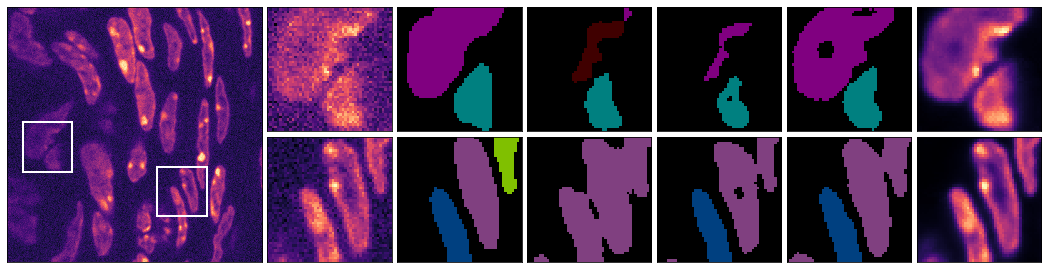

In [37]:
# Set up the axes with gridspec
fig = plt.figure(figsize=cm2inch(12.2, 3.0))
grid = plt.GridSpec(2, 8, left=0.0, right=1.0, bottom=0.0, top=1.0, hspace=0.05, wspace=0.01)
dsb_full = fig.add_subplot(grid[:2, :2])

dsb_in_0 = fig.add_subplot(grid[0, 2])
dsb_gt_0 = fig.add_subplot(grid[0, 3])
dsb_bl_0 = fig.add_subplot(grid[0, 4])
dsb_blSeq_0 = fig.add_subplot(grid[0, 5])
dsb_dNs_0 = fig.add_subplot(grid[0, 6])
dsb_n2v_0 = fig.add_subplot(grid[0, 7])

dsb_in_1 = fig.add_subplot(grid[1, 2])
dsb_gt_1 = fig.add_subplot(grid[1, 3])
dsb_bl_1 = fig.add_subplot(grid[1, 4])
dsb_blSeq_1 = fig.add_subplot(grid[1, 5])
dsb_dNs_1 = fig.add_subplot(grid[1, 6])
dsb_n2v_1 = fig.add_subplot(grid[1, 7])

newcmp = LinearSegmentedColormap.from_list('bla', color_map(6, offset=4), N=6)
imshow(dsb_full, mouse_in)
inset = (slice(115,165), slice(15,65))
in_0 = patches.Rectangle((15, 115), 50, 50, linewidth=2, edgecolor='white', facecolor='none')
dsb_full.add_patch(in_0)
imshow(dsb_in_0, mouse_in[inset])
gt_0 = mouse_gt[inset].copy()
relabel_gt(gt_0)
bl_0 = relabel(gt_0, mouse_bl[inset].copy())
seq_0 = relabel(gt_0, mouse_seq[inset].copy())
joint_0 = relabel(gt_0, mouse_joint[inset].copy())
imshow(dsb_gt_0, gt_0, cmap=newcmp, vmin=0, vmax=6)
imshow(dsb_bl_0, bl_0, cmap=newcmp, vmin=0, vmax=6)
imshow(dsb_blSeq_0, seq_0, cmap=newcmp, vmin=0, vmax=6)
imshow(dsb_dNs_0, joint_0, cmap=newcmp, vmin=0, vmax=6)
imshow(dsb_n2v_0, mouse_pred[inset][...,0])

newcmp = LinearSegmentedColormap.from_list('bla', color_map(4, offset=18), N=4)
inset = (slice(160,210), slice(150,200))
in_1 = patches.Rectangle((150, 160), 50, 50, linewidth=2, edgecolor='white', facecolor='none')
dsb_full.add_patch(in_1)
imshow(dsb_in_1, mouse_in[inset])
gt_1 = mouse_gt[inset].copy()
relabel_gt(gt_1, offset=0)
bl_1 = relabel(gt_1, mouse_bl[inset].copy(), offset=0)
seq_1 = relabel(gt_1, mouse_seq[inset].copy(), offset=0)
joint_1 = relabel(gt_1, mouse_joint[inset].copy(), offset=0)
imshow(dsb_gt_1, gt_1, cmap=newcmp, vmin=0, vmax=4)
imshow(dsb_bl_1, bl_1, cmap=newcmp, vmin=0, vmax=4)
imshow(dsb_blSeq_1, seq_1, cmap=newcmp, vmin=0, vmax=4)
imshow(dsb_dNs_1, joint_1, cmap=newcmp, vmin=0, vmax=4)
imshow(dsb_n2v_1, mouse_pred[inset][...,0])

plt.savefig('/data/Noise2Seg/Figures/qualitative/mouse_qualitative.pdf', pad_inches=0)
print(mouse_total_imgs, mouse_seg_imgs)